First load the necessary modules and api to extract the data.

In [1]:
import cdsapi
import netCDF4
import xarray as xr
import numpy as np
import os
import pandas as pd

In [40]:

c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'year': '2019',
        'month': '12',
        'variable': [
            '2m_temperature'
        ],
        'time': '12:00',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
        ],
    },
    'data_temp.nc')

2020-12-18 16:49:01,479 INFO Welcome to the CDS
2020-12-18 16:49:01,486 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-18 16:49:01,730 INFO Request is completed
2020-12-18 16:49:01,737 INFO Downloading https://download-0006.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1608269581.793644-24461-11-d27216d5-feef-42ee-9c28-0031f3704552.nc to data_temp.nc (185.5M)
2020-12-18 16:58:17,032 INFO Download rate 342.1K/s                                                                    


Result(content_length=194530728,content_type=application/x-netcdf,location=https://download-0006.copernicus-climate.eu/cache-compute-0006/cache/data7/adaptor.mars.internal-1608269581.793644-24461-11-d27216d5-feef-42ee-9c28-0031f3704552.nc)

In [2]:
#importing total precipitation dataset
c = cdsapi.Client()
c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'year': '2019',
        'month': '12',
        'variable': [
            'total_precipitation'
        ],
        'time': '12:00',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
        ],
    },
    'data_precip.nc')

2020-12-19 11:39:16,453 INFO Welcome to the CDS
2020-12-19 11:39:16,465 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-19 11:39:16,673 INFO Request is completed
2020-12-19 11:39:16,681 INFO Downloading https://download-0007.copernicus-climate.eu/cache-compute-0007/cache/data6/adaptor.mars.internal-1608269730.0583844-23245-1-42b44ff5-cb2c-4c50-a6fc-c5b51ed9bb8d.nc to data_precip.nc (185.5M)
2020-12-19 11:40:38,268 INFO Download rate 2.3M/s                                                                      


Result(content_length=194530728,content_type=application/x-netcdf,location=https://download-0007.copernicus-climate.eu/cache-compute-0007/cache/data6/adaptor.mars.internal-1608269730.0583844-23245-1-42b44ff5-cb2c-4c50-a6fc-c5b51ed9bb8d.nc)

In [4]:
# importing volumetric soil layer dataset
c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'year': '2019',
        'month': '12',
        'variable': [
            'volumetric_soil_water_layer_1'
        ],
        'time': '12:00',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
        ],
    },
    'data_soil.nc')

2020-12-19 11:42:12,952 INFO Welcome to the CDS
2020-12-19 11:42:12,959 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-19 11:42:13,169 INFO Downloading https://download-0003.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1608269768.767806-20408-16-8b16c1be-a718-4f54-b2bb-9415dc43d4f1.nc to data_soil.nc (185.5M)
2020-12-19 11:43:48,145 INFO Download rate 2M/s                                                                        


Result(content_length=194530752,content_type=application/x-netcdf,location=https://download-0003.copernicus-climate.eu/cache-compute-0003/cache/data5/adaptor.mars.internal-1608269768.767806-20408-16-8b16c1be-a718-4f54-b2bb-9415dc43d4f1.nc)

Download the data through the url generated above.

In [2]:
#Load the dataset to an xarray
temp_ds = xr.open_dataset('data_temp.nc')

In [4]:
temp_ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 15)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-18 05:33:07 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [60]:
temp_ds.isnull().sum()# find the number of missing values

<xarray.Dataset>
Dimensions:  ()
Data variables:
    t2m      int32 64061055

The longitude value is ranging from 0 to 359.9, the latitude is ranging from -90 to +90

Remove nan values from the dataset

In [3]:
p=temp_ds.dropna("latitude", how="any")
ds_temp=p["t2m"]
ds_temp

<xarray.DataArray 't2m' (time: 15, latitude: 116, longitude: 3600)>
array([[[248.39005, 248.3389 , ..., 248.48521, 248.43834],
        [248.4014 , 248.34885, ..., 248.49089, 248.44685],
        ...,
        [241.741  , 241.741  , ..., 241.741  , 241.741  ],
        [241.68419, 241.68419, ..., 241.68419, 241.68419]],

       [[248.60594, 248.57043, ..., 248.67981, 248.64288],
        [248.60452, 248.56902, ..., 248.67413, 248.63861],
        ...,
        [242.84752, 242.8461 , ..., 242.8461 , 242.8461 ],
        [242.34468, 242.34468, ..., 242.34468, 242.34468]],

       ...,

       [[254.728  , 254.7351 , ..., 254.7138 , 254.7209 ],
        [254.82318, 254.82886, ..., 254.80612, 254.81323],
        ...,
        [244.02364, 244.02364, ..., 244.0208 , 244.02222],
        [242.94269, 242.94269, ..., 242.94269, 242.94269]],

       [[254.20671, 254.15273, ..., 254.23227, 254.21806],
        [254.23369, 254.17972, ..., 254.25359, 254.24364],
        ...,
        [244.33897, 244.34181, ..., 244.33897, 244.33897],
        [244.5776 , 244.5776 , ..., 244.5776 , 244.5776 ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 -78.5 -78.6 -78.7 -78.8 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
Attributes:
    units:      K
    long_name:  2 metre temperature

In [121]:
ds_temp.dims

('time', 'latitude', 'longitude')

In [80]:
print(ds_temp.min())
print(ds_temp.max())
print(ds_temp.mean())
print(ds_temp.median())
print(ds_temp.std())

<xarray.DataArray 't2m' ()>
array(234.16584778)
<xarray.DataArray 't2m' ()>
array(274.96063232)
<xarray.DataArray 't2m' ()>
array(250.04375, dtype=float32)
<xarray.DataArray 't2m' ()>
array(247.74658203)
<xarray.DataArray 't2m' ()>
array(9.12650871)


The temperature have a mean of about 250 with a standard deviation of 9.12

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Aman\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Aman\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


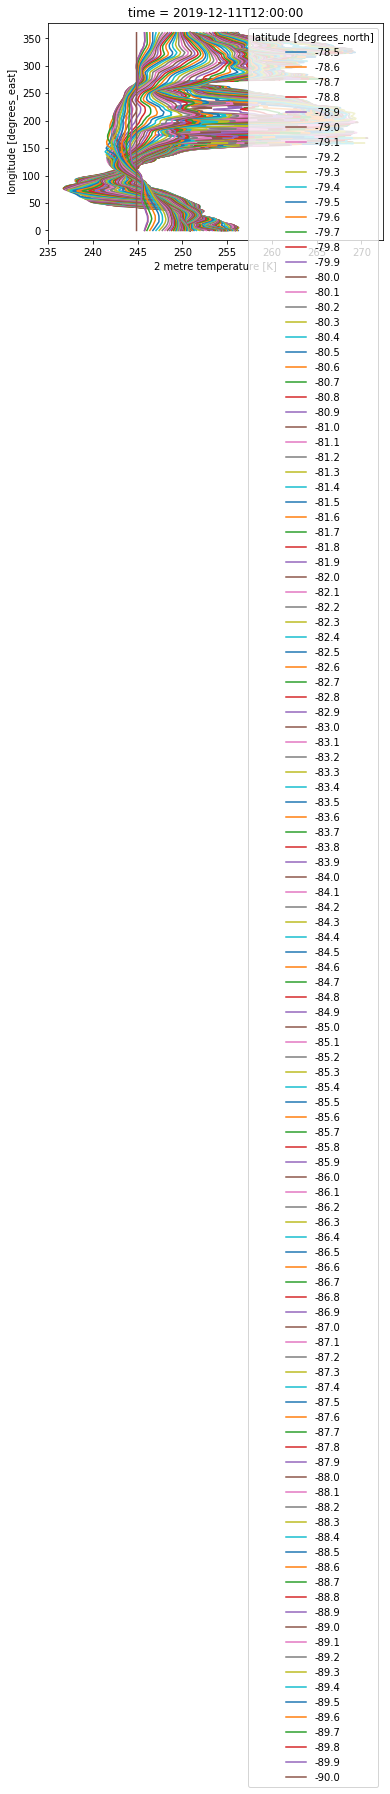

In [100]:
ds_temp.isel(time=10).plot(y="longitude", hue="latitude")

The temperature seems to be like deviating more to the right or increasing as the latitude or longitude value increasing.

(array([  90364.,  950403., 1726028.,  962541.,  752467.,  517699.,
         642252.,  490553.,  125295.,    6398.]),
 array([234.16585, 238.24533, 242.3248 , 246.40428, 250.48376, 254.56323,
        258.64273, 262.7222 , 266.80167, 270.88116, 274.96063],
       dtype=float32),
 <a list of 10 Patch objects>)

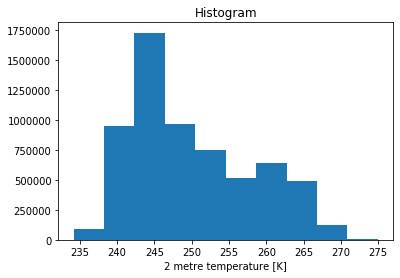

In [103]:
ds_temp.plot.hist()

Seems like the data is skewed towards right or positively skewed. Mean is greater than median.

In [5]:
# Removing missing values from precipitation dataset
prec_ds= xr.open_dataset('data_precip.nc')
prec_ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 15)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-18 05:35:36 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [6]:
p=prec_ds.dropna("latitude", how="any")
ds_prec=p["tp"]
ds_prec

<xarray.DataArray 'tp' (time: 15, latitude: 116, longitude: 3600)>
array([[[3.345311e-06, 3.345311e-06, ..., 3.345311e-06, 3.345311e-06],
        [6.683171e-06, 6.683171e-06, ..., 6.683171e-06, 6.683171e-06],
        ...,
        [2.672523e-05, 2.672523e-05, ..., 2.672523e-05, 2.672523e-05],
        [4.008412e-05, 4.008412e-05, ..., 4.008412e-05, 4.008412e-05]],

       [[7.450581e-09, 7.450581e-09, ..., 7.450581e-09, 7.450581e-09],
        [7.450581e-09, 7.450581e-09, ..., 7.450581e-09, 7.450581e-09],
        ...,
        [6.347150e-05, 6.347150e-05, ..., 6.680936e-05, 6.347150e-05],
        [9.018928e-05, 9.018928e-05, ..., 9.018928e-05, 9.018928e-05]],

       ...,

       [[1.336634e-05, 1.336634e-05, ..., 1.336634e-05, 1.336634e-05],
        [1.670420e-05, 1.670420e-05, ..., 1.336634e-05, 1.336634e-05],
        ...,
        [7.450581e-09, 7.450581e-09, ..., 7.450581e-09, 7.450581e-09],
        [7.450581e-09, 7.450581e-09, ..., 7.450581e-09, 7.450581e-09]],

       [[7.450581e-09, 7.450581e-09, ..., 7.450581e-09, 7.450581e-09],
        [7.450581e-09, 7.450581e-09, ..., 7.450581e-09, 7.450581e-09],
        ...,
        [5.010515e-05, 5.010515e-05, ..., 5.010515e-05, 5.010515e-05],
        [6.347150e-05, 6.347150e-05, ..., 6.347150e-05, 6.347150e-05]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 -78.5 -78.6 -78.7 -78.8 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [84]:
print(ds_prec.min())
print(ds_prec.max())
print("mean is ",ds_prec.mean())
print(ds_prec.median())
print(ds_prec.std())

<xarray.DataArray 'tp' ()>
array(7.4505806e-09)
<xarray.DataArray 'tp' ()>
array(0.00977007)
mean is  <xarray.DataArray 'tp' ()>
array(5.7320358e-05, dtype=float32)
<xarray.DataArray 'tp' ()>
array(3.34531069e-06)
<xarray.DataArray 'tp' ()>
array(0.00019581)


The mean of precipitation is around 5.73* 10^-6 with a std of 0.00019581. Mean is much greater than median means data is very much skewed positively.

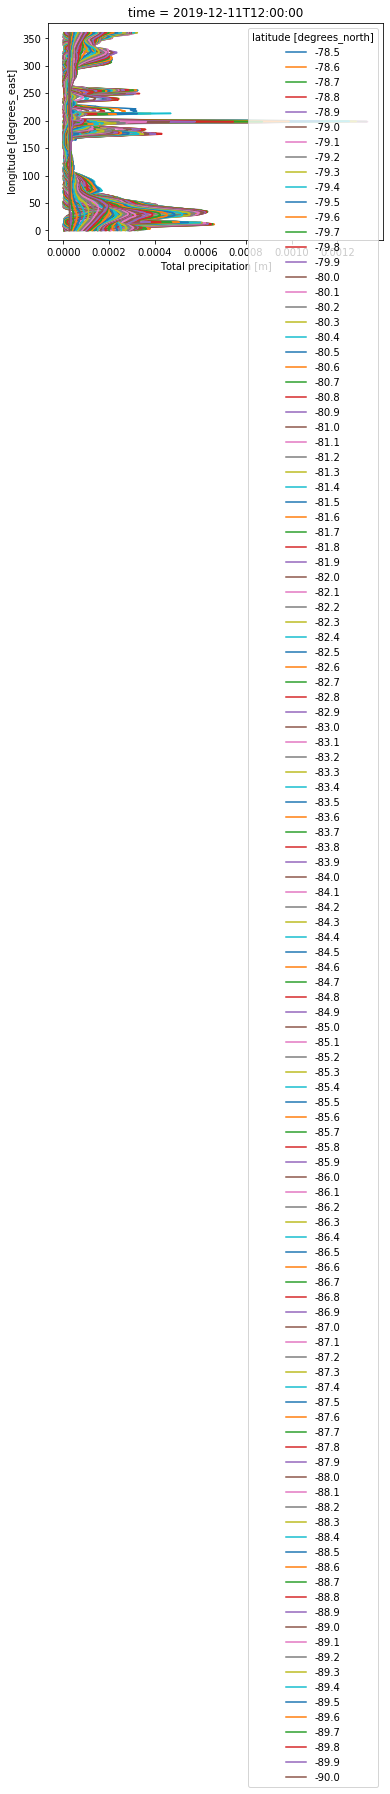

In [10]:
ds_prec.isel(time=10).plot(y="longitude", hue="latitude")

The Total precipitation is deviating so much. The data is very unstable. No trend is there.

(array([5.831556e+06, 2.431460e+05, 8.132500e+04, 4.085000e+04,
        2.298400e+04, 1.409100e+04, 9.007000e+03, 5.105000e+03,
        3.508000e+03, 2.501000e+03, 1.901000e+03, 1.344000e+03,
        1.034000e+03, 9.170000e+02, 7.720000e+02, 5.550000e+02,
        3.310000e+02, 3.150000e+02, 2.690000e+02, 2.640000e+02,
        2.550000e+02, 2.350000e+02, 1.750000e+02, 2.210000e+02,
        1.510000e+02, 1.510000e+02, 1.220000e+02, 1.220000e+02,
        8.200000e+01, 5.500000e+01, 5.300000e+01, 5.000000e+01,
        5.000000e+01, 5.000000e+01, 5.100000e+01, 5.100000e+01,
        4.200000e+01, 3.400000e+01, 2.900000e+01, 2.700000e+01,
        2.700000e+01, 2.700000e+01, 3.200000e+01, 2.700000e+01,
        3.200000e+01, 2.400000e+01, 1.400000e+01, 1.500000e+01,
        1.500000e+01, 6.000000e+00]),
 array([7.4505806e-09, 1.9540862e-04, 3.9080979e-04, 5.8621092e-04,
        7.8161212e-04, 9.7701326e-04, 1.1724144e-03, 1.3678155e-03,
        1.5632168e-03, 1.7586179e-03, 1.9540191e-03, 2.149

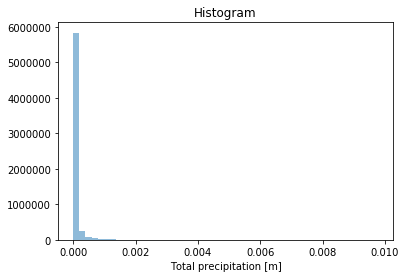

In [110]:
ds_prec.plot.hist(bins=50,alpha=0.5)

It is clear from the histogram that the data is highly skewed

In [7]:
soil_ds= xr.open_dataset('data_soil.nc')
soil_ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 15)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-18 05:36:14 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [8]:
p=soil_ds.dropna("latitude", how="any")
ds_soil=p["swvl1"]
ds_soil

<xarray.DataArray 'swvl1' (time: 15, latitude: 116, longitude: 3600)>
array([[[0.258499, 0.258838, ..., 0.260767, 0.259633],
        [0.256688, 0.25636 , ..., 0.257786, 0.257237],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       [[0.258499, 0.258838, ..., 0.260767, 0.259633],
        [0.256688, 0.25636 , ..., 0.257786, 0.257237],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       ...,

       [[0.258499, 0.258838, ..., 0.260767, 0.259633],
        [0.256688, 0.25636 , ..., 0.257786, 0.257237],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]],

       [[0.258499, 0.258838, ..., 0.260767, 0.259633],
        [0.256688, 0.25636 , ..., 0.257786, 0.257237],
        ...,
        [0.158244, 0.158139, ..., 0.158665, 0.158443],
        [0.206098, 0.206098, ..., 0.206098, 0.206098]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 -78.5 -78.6 -78.7 -78.8 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
Attributes:
    units:      m**3 m**-3
    long_name:  Volumetric soil water layer 1

In [85]:
print(ds_soil.min())
print(ds_soil.max())
print("mean is ",ds_soil.mean())
print(ds_soil.median())
print(ds_soil.std())

<xarray.DataArray 'swvl1' ()>
array(0.009994)
<xarray.DataArray 'swvl1' ()>
array(0.40289184)
mean is  <xarray.DataArray 'swvl1' ()>
array(0.22909866, dtype=float32)
<xarray.DataArray 'swvl1' ()>
array(0.22167936)
<xarray.DataArray 'swvl1' ()>
array(0.06809624)


The avg volumetric soil water layer is 0.22 with an std of 0.06. Median is closely resembling to mean. Let's do some visualizations to know more about the data.

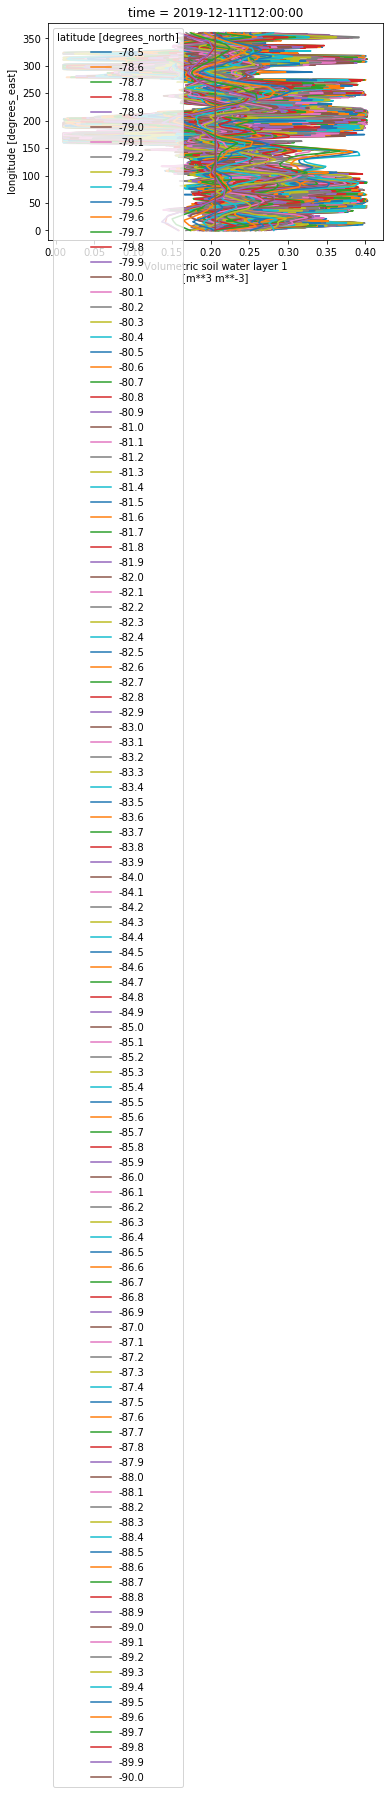

In [111]:
ds_soil.isel(time=10).plot(y="longitude", hue="latitude")

The data seems like cyclic increasing or decreasing after a certain increase in latitude or longitude.

(array([ 118665.,   75195.,  126465.,  343215., 1721100., 1747920.,
         984825.,  547035.,  328170.,  271410.]),
 array([0.009994  , 0.04928378, 0.08857357, 0.12786335, 0.16715313,
        0.20644292, 0.24573271, 0.2850225 , 0.32431227, 0.36360207,
        0.40289184], dtype=float32),
 <a list of 10 Patch objects>)

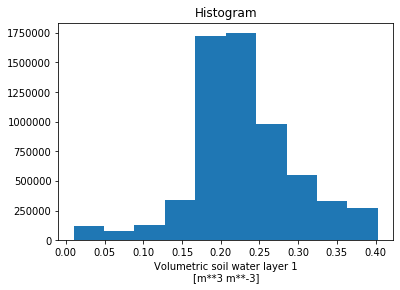

In [58]:
ds_soil.plot.hist()

The data distribution seems good, data is not that much skewed in either direction.

In [9]:
# interpolating dataset to change the resolution from 0.1 x 0.1 to 0.05 x 0.05
new_lon = np.linspace(ds_temp.longitude[0], ds_temp.longitude[-1], ds_temp.shape[2] * 2) # multiplying by to 2 so that to get 
#double of the previous resolution

new_lat = np.linspace(ds_temp.latitude[0], ds_temp.latitude[-1], ds_temp.shape[1] * 2)

dsi_temp = ds_temp.interp(latitude=new_lat, longitude=new_lon)

In [129]:
dsi_temp

<xarray.DataArray 't2m' (time: 15, latitude: 232, longitude: 7200)>
array([[[248.39004517, 248.36447499, 248.33890481, ..., 248.48520486,
         248.46177205, 248.43833923],
        [248.39569695, 248.36977738, 248.34385782, ..., 248.48803103,
         248.46530455, 248.44257807],
        [248.40134873, 248.37507978, 248.34881082, ..., 248.49085721,
         248.46883706, 248.44681691],
        ...,
        [241.74075225, 241.74075225, 241.74075225, ..., 241.74075225,
         241.74075225, 241.74075225],
        [241.71247055, 241.71247055, 241.71247055, ..., 241.71247055,
         241.71247055, 241.71247055],
        [241.68418884, 241.68418884, 241.68418884, ..., 241.68418884,
         241.68418884, 241.68418884]],

       [[248.60594177, 248.58819064, 248.5704395 , ..., 248.67980219,
         248.66134274, 248.6428833 ],
        [248.6052353 , 248.58748417, 248.56973303, ..., 248.67697644,
         248.65886636, 248.64075629],
        [248.60452883, 248.58677769, 248.56902656, ..., 248.67415068,
         248.65638998, 248.63862927],
...
        [244.01897286, 244.01897286, 244.01897286, ..., 244.0161473 ,
         244.01685362, 244.01755994],
        [243.48083043, 243.48083043, 243.48083043, ..., 243.47941764,
         243.4797708 , 243.48012396],
        [242.94268799, 242.94268799, 242.94268799, ..., 242.94268799,
         242.94268799, 242.94268799]],

       [[254.20671082, 254.17972177, 254.15273272, ..., 254.23226645,
         254.2251649 , 254.21806335],
        [254.2201414 , 254.19315615, 254.1661709 , ..., 254.24287916,
         254.23683711, 254.23079506],
        [254.23357198, 254.20659053, 254.17960907, ..., 254.25349187,
         254.24850932, 254.24352676],
        ...,
        [244.34000341, 244.34141616, 244.34282891, ..., 244.34000341,
         244.34000341, 244.34000341],
        [244.4588048 , 244.45951118, 244.46021756, ..., 244.4588048 ,
         244.4588048 , 244.4588048 ],
        [244.5776062 , 244.5776062 , 244.5776062 , ..., 244.5776062 ,
         244.5776062 , 244.5776062 ]]])
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
  * latitude   (latitude) float64 -78.5 -78.55 -78.6 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.04999 0.09999 ... 359.8 359.9 359.9
Attributes:
    units:      K
    long_name:  2 metre temperature

Similarly increase resolution for two other datasets

In [10]:
new_lon = np.linspace(ds_prec.longitude[0], ds_prec.longitude[-1], ds_prec.shape[2] * 2) # multiplying by to 2 so that to get 
#double of the previous resolution

new_lat = np.linspace(ds_prec.latitude[0], ds_prec.latitude[-1], ds_prec.shape[1] * 2)

dsi_prec = ds_prec.interp(latitude=new_lat, longitude=new_lon)

In [15]:
dsi_prec

<xarray.DataArray 'tp' (time: 15, latitude: 232, longitude: 7200)>
array([[[3.34531069e-06, 3.34531069e-06, 3.34531069e-06, ...,
         3.34531069e-06, 3.34531069e-06, 3.34531069e-06],
        [5.00704129e-06, 5.00704129e-06, 5.00704129e-06, ...,
         5.00704129e-06, 5.00704129e-06, 5.00704129e-06],
        [6.66877190e-06, 6.66877190e-06, 6.66877190e-06, ...,
         6.66877190e-06, 6.66877190e-06, 6.66877190e-06],
        ...,
        [2.67828605e-05, 2.67828605e-05, 2.67828605e-05, ...,
         2.67828605e-05, 2.67828605e-05, 2.67828605e-05],
        [3.34334920e-05, 3.34334920e-05, 3.34334920e-05, ...,
         3.34334920e-05, 3.34334920e-05, 3.34334920e-05],
        [4.00841236e-05, 4.00841236e-05, 4.00841236e-05, ...,
         4.00841236e-05, 4.00841236e-05, 4.00841236e-05]],

       [[7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
...
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09]],

       [[7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        [7.45058060e-09, 7.45058060e-09, 7.45058060e-09, ...,
         7.45058060e-09, 7.45058060e-09, 7.45058060e-09],
        ...,
        [5.01628146e-05, 5.01628146e-05, 5.01628146e-05, ...,
         5.01628146e-05, 5.01628146e-05, 5.01628146e-05],
        [5.68171554e-05, 5.68171554e-05, 5.68171554e-05, ...,
         5.68171554e-05, 5.68171554e-05, 5.68171554e-05],
        [6.34714961e-05, 6.34714961e-05, 6.34714961e-05, ...,
         6.34714961e-05, 6.34714961e-05, 6.34714961e-05]]])
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
  * latitude   (latitude) float64 -78.5 -78.55 -78.6 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.04999 0.09999 ... 359.8 359.9 359.9
Attributes:
    units:      m
    long_name:  Total precipitation

In [11]:
new_lon = np.linspace(ds_soil.longitude[0], ds_soil.longitude[-1], ds_soil.shape[2] * 2) # multiplying by to 2 so that to get 
#double of the previous resolution

new_lat = np.linspace(ds_soil.latitude[0], ds_soil.latitude[-1], ds_soil.shape[1] * 2)

dsi_soil = ds_soil.interp(latitude=new_lat, longitude=new_lon)

In [216]:
dsi_soil

<xarray.DataArray 'swvl1' (time: 15, latitude: 232, longitude: 7200)>
array([[[0.25849926, 0.25866874, 0.25883822, ..., 0.2607667 ,
         0.2601999 , 0.25963309],
        [0.2575973 , 0.25760095, 0.25760459, ..., 0.25928286,
         0.25886151, 0.25844016],
        [0.25669534, 0.25653315, 0.25637097, ..., 0.25779902,
         0.25752313, 0.25724723],
        ...,
        [0.15845031, 0.15839795, 0.15834558, ..., 0.15886925,
         0.15875871, 0.15864816],
        [0.1822742 , 0.18224802, 0.18222184, ..., 0.18248367,
         0.1824284 , 0.18237313],
        [0.20609809, 0.20609809, 0.20609809, ..., 0.20609809,
         0.20609809, 0.20609809]],

       [[0.25849926, 0.25866874, 0.25883822, ..., 0.2607667 ,
         0.2601999 , 0.25963309],
        [0.2575973 , 0.25760095, 0.25760459, ..., 0.25928286,
         0.25886151, 0.25844016],
        [0.25669534, 0.25653315, 0.25637097, ..., 0.25779902,
         0.25752313, 0.25724723],
...
        [0.15845031, 0.15839795, 0.15834558, ..., 0.15886925,
         0.15875871, 0.15864816],
        [0.1822742 , 0.18224802, 0.18222184, ..., 0.18248367,
         0.1824284 , 0.18237313],
        [0.20609809, 0.20609809, 0.20609809, ..., 0.20609809,
         0.20609809, 0.20609809]],

       [[0.25849926, 0.25866874, 0.25883822, ..., 0.2607667 ,
         0.2601999 , 0.25963309],
        [0.2575973 , 0.25760095, 0.25760459, ..., 0.25928286,
         0.25886151, 0.25844016],
        [0.25669534, 0.25653315, 0.25637097, ..., 0.25779902,
         0.25752313, 0.25724723],
        ...,
        [0.15845031, 0.15839795, 0.15834558, ..., 0.15886925,
         0.15875871, 0.15864816],
        [0.1822742 , 0.18224802, 0.18222184, ..., 0.18248367,
         0.1824284 , 0.18237313],
        [0.20609809, 0.20609809, 0.20609809, ..., 0.20609809,
         0.20609809, 0.20609809]]])
Coordinates:
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-15T12:00:00
  * latitude   (latitude) float64 -78.5 -78.55 -78.6 ... -89.9 -89.95 -90.0
  * longitude  (longitude) float64 0.0 0.04999 0.09999 ... 359.8 359.9 359.9
Attributes:
    units:      m**3 m**-3
    long_name:  Volumetric soil water layer 1

In [12]:
from scipy import stats

The precipitation data is highly positively skewed, so applying a log function to all the values will normalize the data in such a way that the very bigger values will come to a suitable scale. So we can apply boxcox transformation here.

In [13]:
# Applying the boxcox transformation to precipitation data to make the data stable and less skewed
a=[]
for i in range(15):
    k=[]
    for j in range(232):
        ap=stats.boxcox(dsi_prec[i,j,:])
        k.append(list(ap[0]))
    a.append(k)

C:\Users\Aman\Anaconda3\lib\site-packages\scipy\stats\morestats.py:910: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\Aman\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1959: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Aman\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1960: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Aman\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1961: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
C:\Users\Aman\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1962: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)


In [15]:
dsi_trns=np.array(a)

In [44]:
# Converting transformed data back to xarray
time=dsi_prec.coords["time"].values
lat=dsi_prec.coords["latitude"].values
lon=dsi_prec.coords["longitude"].values

dsi_ar = xr.DataArray(data=dsi_trns,
                  coords={"time":  time,
                          "latitude":  lat, 
                          "longitude": lon},
                  dims=["time","latitude","longitude"])

(array([7.0280000e+03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.5048972e+07]),
 array([-3.26612677e+62, -2.93951409e+62, -2.61290141e+62, -2.28628874e+62,
        -1.95967606e+62, -1.63306338e+62, -1.30645071e+62, -9.79838030e+61,
        -6.53225353e+61, -3.26612677e+61, -1.59317000e-01]),
 <a list of 10 Patch objects>)

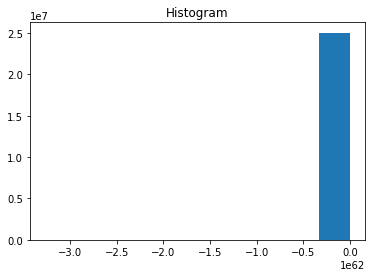

In [61]:
dsi_ar.plot.hist()
# the std of data has become too low but it is less skewed as compared to untransformed data

Now apply deep learning models to the prepared data

In [66]:
import torch

In [68]:
X_1=torch.from_numpy(dsi_temp.values)# converting to tensors
X_2=torch.from_numpy(dsi_soil.values)
y=torch.from_numpy(dsi_ar.values)

In [89]:
X = torch.stack((X_1,X_2), dim=3)# stacking the soil and temperature data

In [94]:
X.shape

torch.Size([15, 232, 7200, 2])

The data needs to be splitted now.
We are splitting first 12 days data for training and next day data for validation and last two day data for testing purposes.

In [96]:
X_train=X[:12,:,:,:]
X_val=X[12,:,:,:]
X_test=X[13,:,:,:]

In [98]:
y_train=y[:12,:,:]
y_val=y[12,:,:]
y_test=y[13:,:,:]

In [100]:
X_train.shape

torch.Size([12, 232, 7200, 2])

In [101]:
y_train.shape

torch.Size([12, 232, 7200])

In [102]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torch import optim

train_ds = TensorDataset(X_train, y_train)# converting data to a tensor dataset
valid_ds = TensorDataset(X_val, y_val)

Defining the model
Applying 3 linear layers and two sigmoid activations on those layers.

In [112]:
class my_model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        #self.lin = nn.Linear(784, 10)
        self.lin=torch.nn.Sequential(            
                 torch.nn.Linear(X_train.shape[3],1024),
                 torch.nn.Sigmoid(), 
                 torch.nn.Linear(1024,232), 
                 torch.nn.Sigmoid(),
                 torch.nn.Linear(232,7200),
                 
         )

    def forward(self, xb):
        return self.lin(xb)

In [115]:
import torch.nn as F

loss_func = F.MSELoss # Taking mean squared error as a loss here

In [107]:
def get_model():
    model = my_model()
    return model, optim.SGD(model.parameters(), lr=lr)
lr=0.3
model, opt = get_model()

In [108]:
def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

In [109]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

In [110]:
import numpy as np

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, val_loss)

In [111]:
bs=100
epochs=25

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model, opt = get_model()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:72] data. DefaultCPUAllocator: not enough memory: you tried to allocate 164207001600 bytes. Buy new RAM!
